> بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ<small>  
Bismillāh ir-raḥmān ir-raḥīm

In the name of God, the Most Gracious, the Most Merciful  
Em nome de Deus, o Clemente, o Misericordioso</small>

# Imports

In [695]:
# #
# Imports
import re
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from plot_utils import explore_distribution, plot_feature, plot_correlation

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Main Code

## Loading the Dataframe

In [633]:
df = pd.read_csv('TelecomX_Data_Transformed.csv')
df.drop(columns=['CustomerID', 'Demographics'], inplace=True) # Dropping unnecessary features
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Mensal,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fibra Ótica,No,...,Yes,No,No,No,Mensal,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fibra Ótica,No,...,Yes,No,Yes,Yes,Mensal,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fibra Ótica,No,...,No,Yes,Yes,No,Mensal,Yes,Mailed check,83.9,267.40,2.796667


## Exploratory Data Analysis

### Info

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   Gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   object 
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   Tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### Define X and Y

In [635]:
x = df.drop(columns=['Churn'])
y = df['Churn']

### Target Variable (Y)

------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB
------------------------------


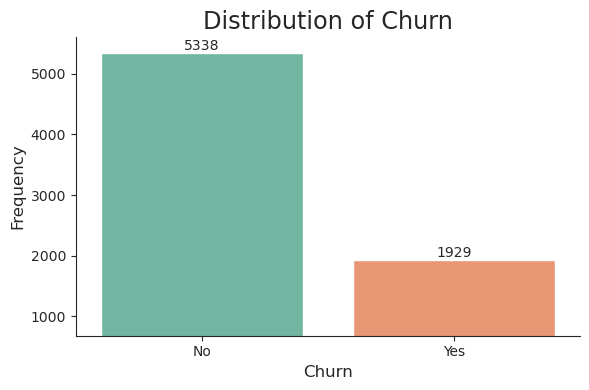

In [636]:
y.value_counts()
print('-' * 30)
y.info()
print('-' * 30)
plot_feature(df, 'Churn')

### Features (X)

Graphical exploratory analysis of each candidate feature in the dataset.

#### Continous

##### Tenure

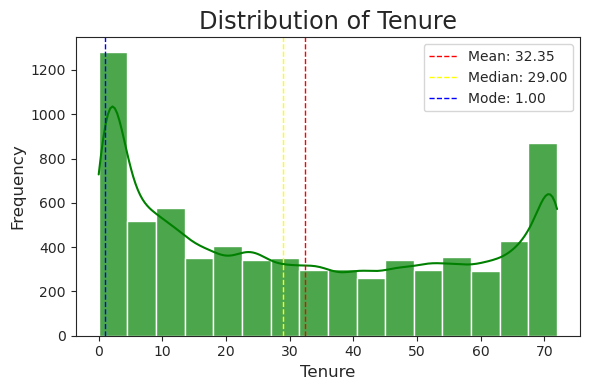

In [637]:
plot_feature(df, 'Tenure')

##### Daily

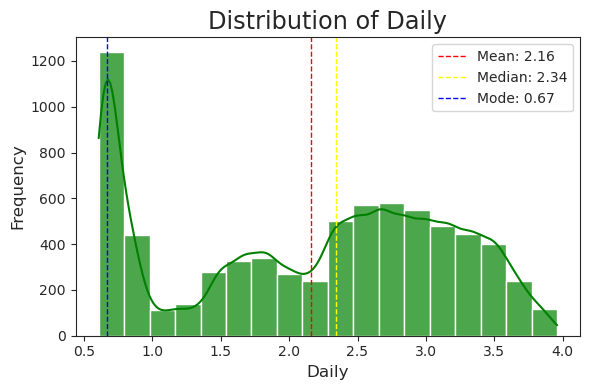

In [638]:
plot_feature(df, 'Daily')

##### Monthly

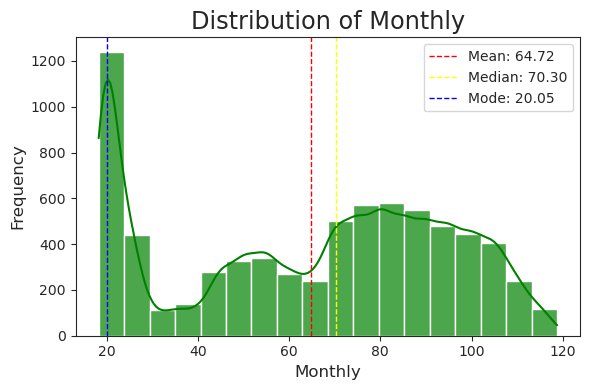

In [639]:
plot_feature(df, 'Monthly')

##### Total

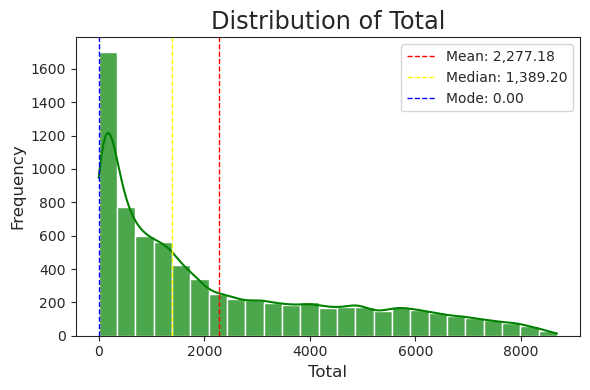

In [640]:
plot_feature(df, 'Total')

#### Categoricals

##### Gender

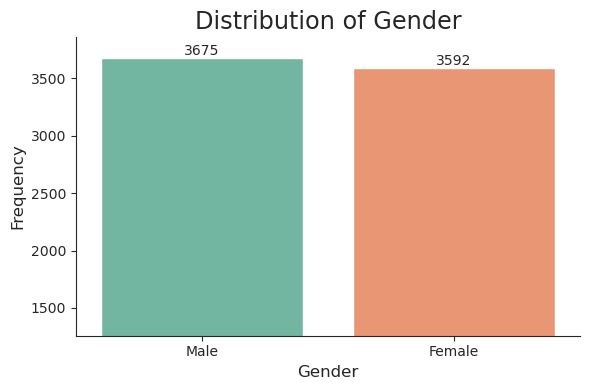

In [641]:
plot_feature(df, 'Gender')

##### SeniorCitizen

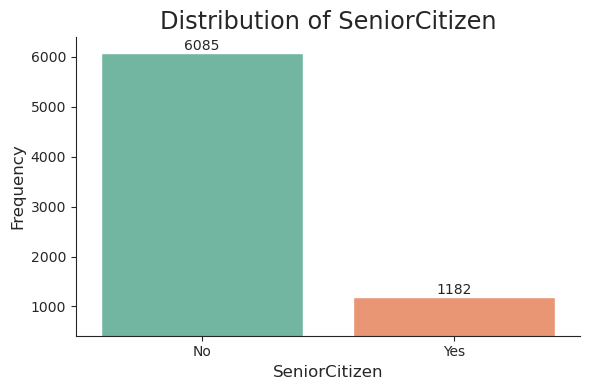

In [642]:
plot_feature(df, 'SeniorCitizen')

##### Partner

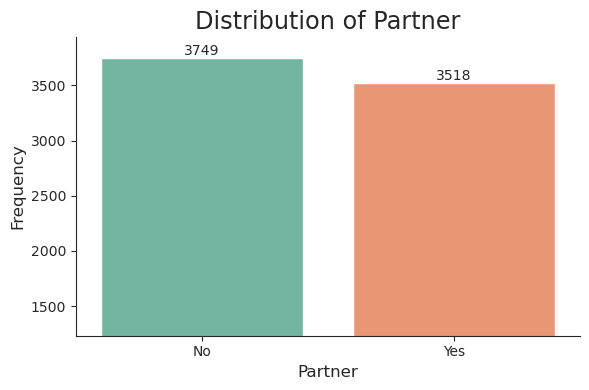

In [643]:
plot_feature(df, 'Partner')

##### Dependents

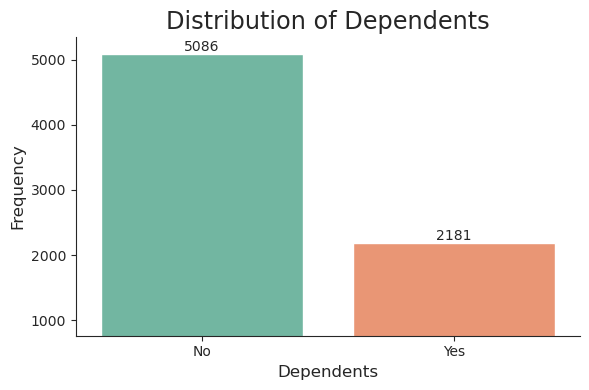

In [644]:
plot_feature(df, 'Dependents')

##### PhoneService

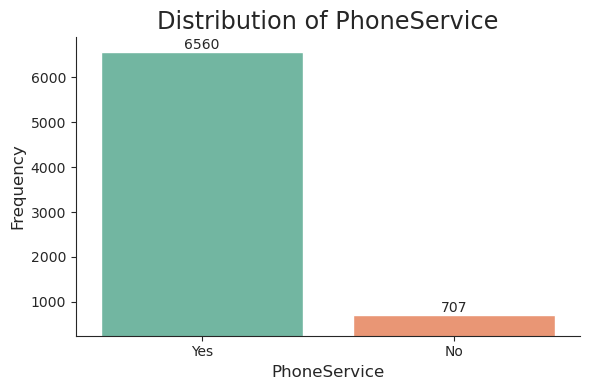

In [645]:
plot_feature(df, 'PhoneService')

##### MultipleLines

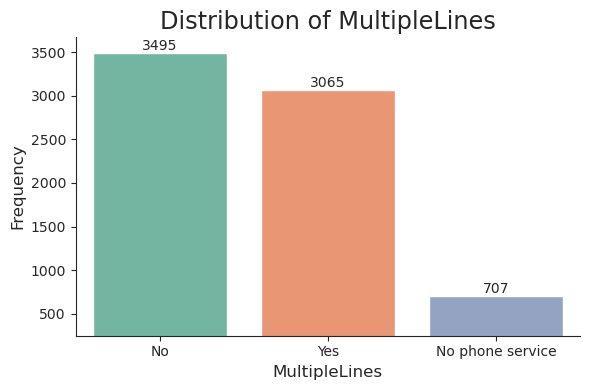

In [646]:
plot_feature(df, 'MultipleLines')

##### InternetService

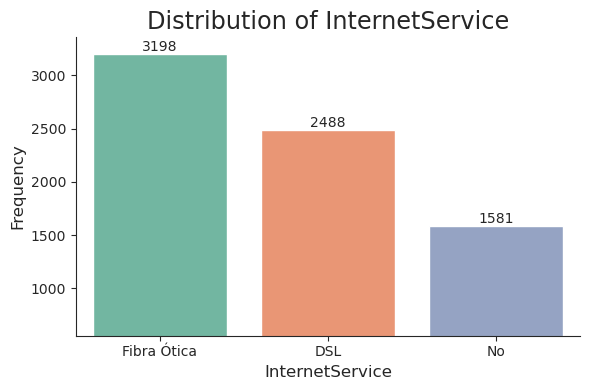

In [647]:
plot_feature(df, 'InternetService')

##### OnlineSecurity

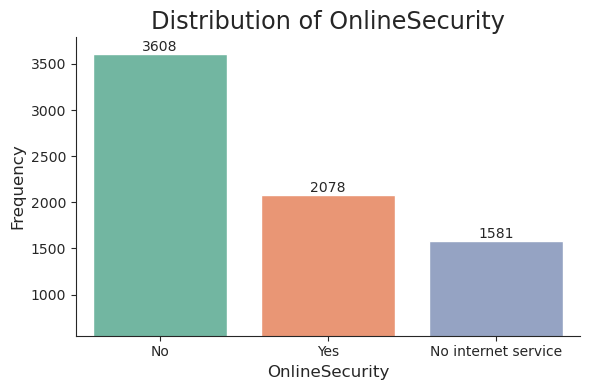

In [648]:
plot_feature(df, 'OnlineSecurity')

##### OnlineBackup

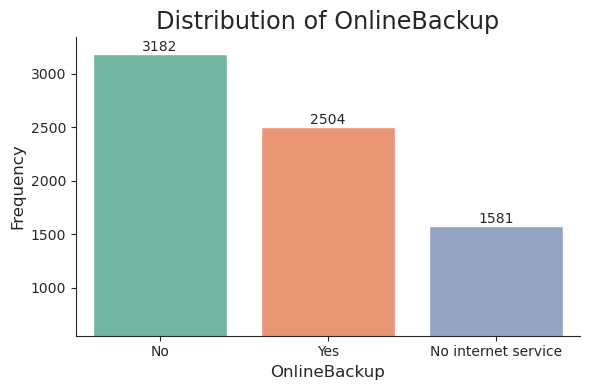

In [649]:
plot_feature(df, 'OnlineBackup')

##### DeviceProtection

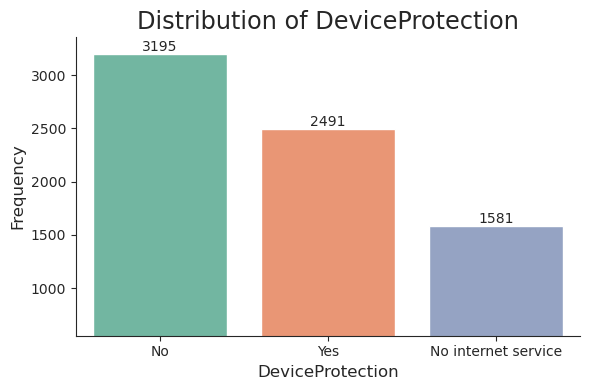

In [650]:
plot_feature(df, 'DeviceProtection')

##### TechSupport

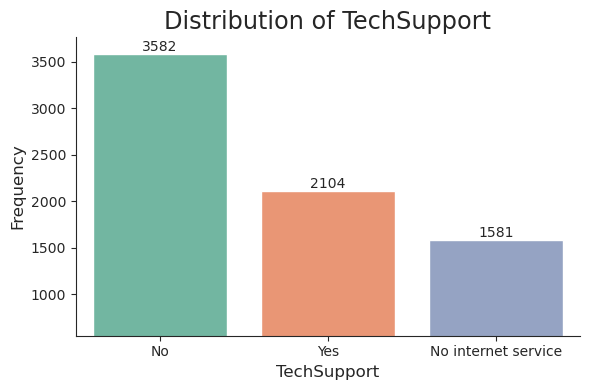

In [651]:
plot_feature(df, 'TechSupport')

##### StreamingTV

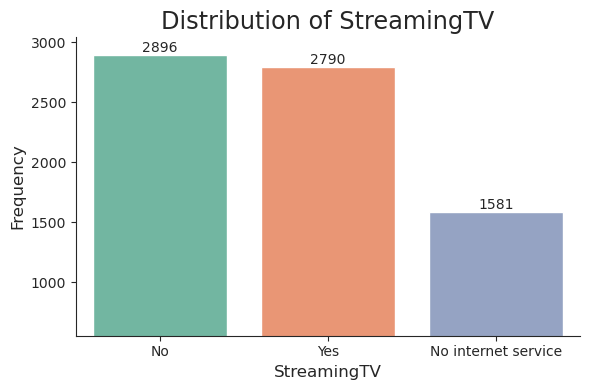

In [652]:
plot_feature(df, 'StreamingTV')

##### StreamingMovies

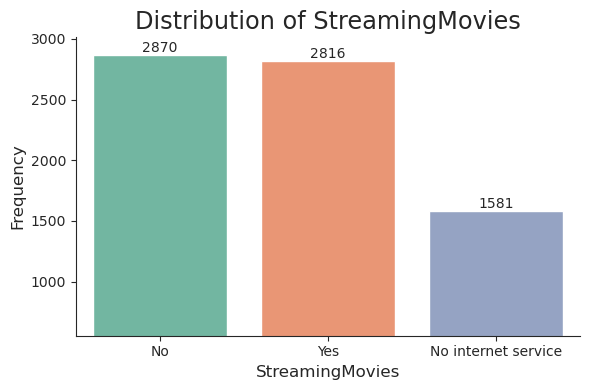

In [653]:
plot_feature(df, 'StreamingMovies')

##### Contract

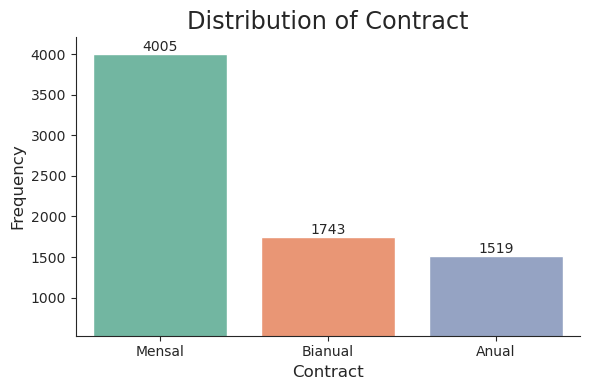

In [654]:
plot_feature(df, 'Contract')

##### PaperlessBilling

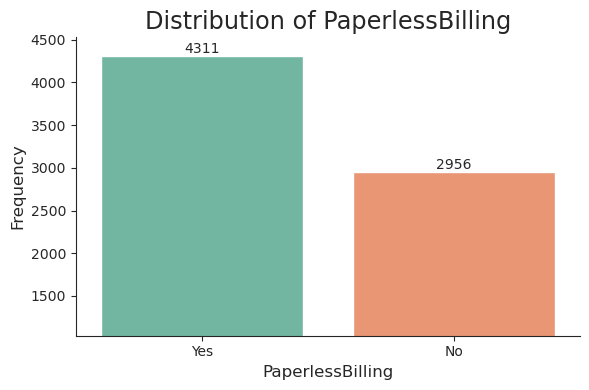

In [655]:
plot_feature(df, 'PaperlessBilling')

##### PaymentMethod

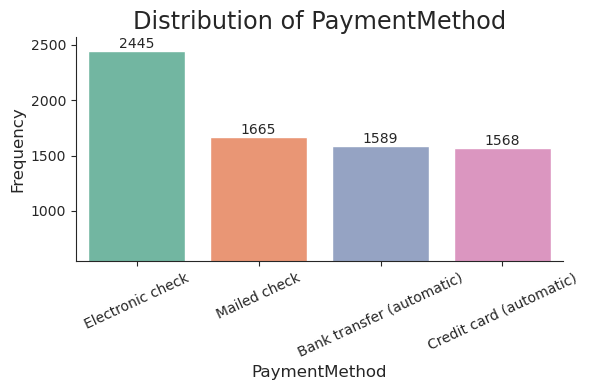

In [656]:
plot_feature(df, 'PaymentMethod')

## Data preprocessing

### Continous features

Studying continous features `['Monthly', 'Daily', 'Total', 'Tenure']`

#### Correlations

Analysing the correlation between the continous features

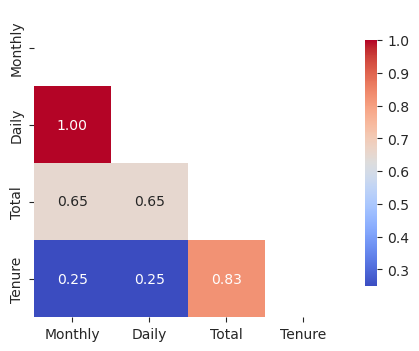

In [657]:
plot_correlation(x, ['Monthly', 'Daily', 'Total', 'Tenure'])

> 1. As expected, 'Daily' feature and 'Monthly' feature correlation is 1, which means they have perfect positive correlation. I happens because Daily = Monthly / 30.  
Monthly shall be dropped

> 2. Tenure and total presents multicollinearity, as Monthly × Tenure ≈ Total.  
Total shall also be dropped.

##### Drop daily

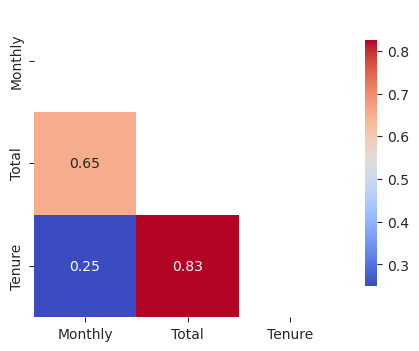

In [658]:
x.drop(columns=['Daily'], inplace=True)
plot_correlation(x, ['Monthly', 'Total', 'Tenure'])

##### Drop total

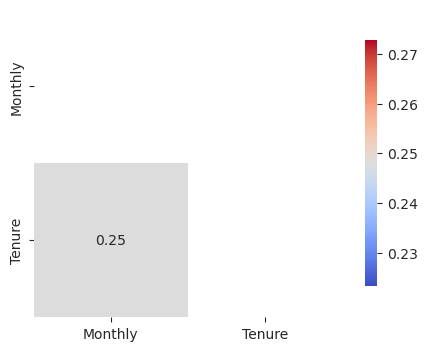

In [659]:
x.drop(columns=['Total'], inplace=True)
plot_correlation(x, ['Monthly', 'Tenure'])

#### Distributions

In [660]:
x.describe()

,Tenure,Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


##### Monthly

=> Exploration of Monthly:

Monthly
20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.216539
kurtosis   -1.261512
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Monthly, dtype: float64
------------------------------


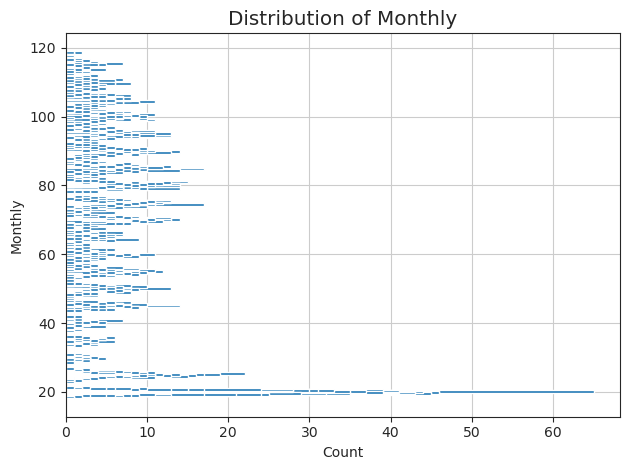

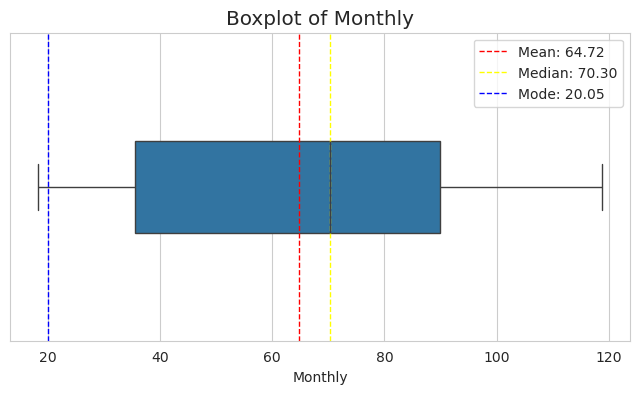

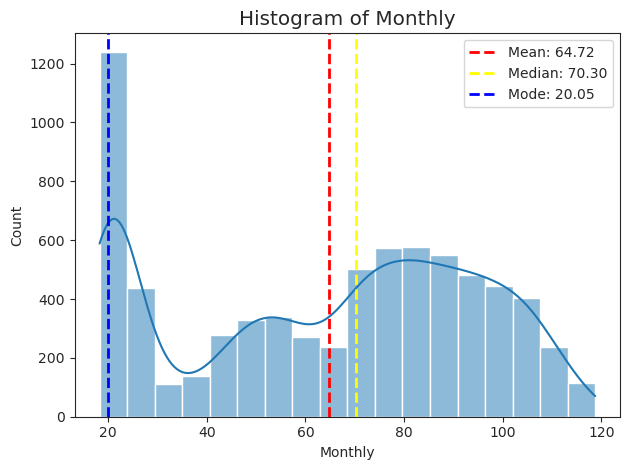

In [661]:
explore_distribution(x, 'Monthly')

##### Tenure

=> Exploration of Tenure:

Tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    0.239523
kurtosis   -1.388981
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64
------------------------------


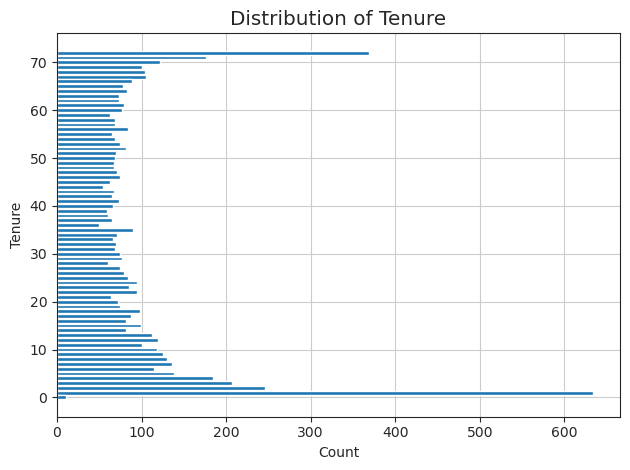

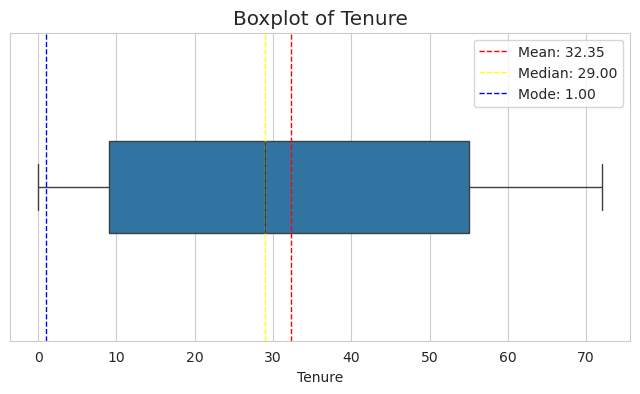

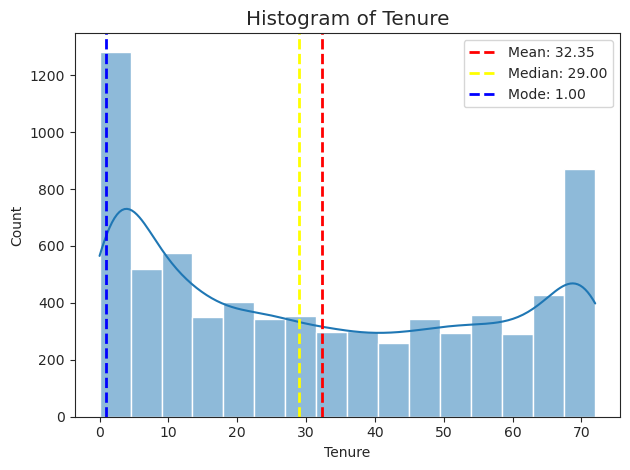

In [662]:
explore_distribution(x, 'Tenure')

#### Considerations

1. The continous features are right-skewed and uneven.

2. A logarithmic column will be set up in seek to reach lesser values for skewness and kurtosis and check possibilities.
3. The possibility of binning is not fit for `Monthly` due to the length of unique values, but may be a good strategy for `Tenure`

#### Logarithm columns setup

In [663]:
def generate_log_features(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    df[f'log_{feature}'] = np.log1p(df[feature])
    return df

In [664]:
x = generate_log_features(x, 'Monthly')
x = generate_log_features(x, 'Tenure')
x[['Monthly', 'log_Monthly', 'Tenure', 'log_Tenure']].head(2)

,Monthly,log_Monthly,Tenure,log_Tenure
0,65.6,4.198705,9,2.302585
1,59.9,4.109233,9,2.302585


=> Exploration of log_Monthly:

log_Monthly
3.046901    65
3.037354    46
3.039749    46
3.030134    45
3.022861    45
            ..
3.196630     1
4.766864     1
4.680741     1
4.242046     1
4.231930     1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.714302
kurtosis   -0.974319
count    7267.000000
mean        4.042297
std         0.580969
min         2.957511
25%         3.595255
50%         4.266896
75%         4.509485
max         4.785406
Name: log_Monthly, dtype: float64
------------------------------


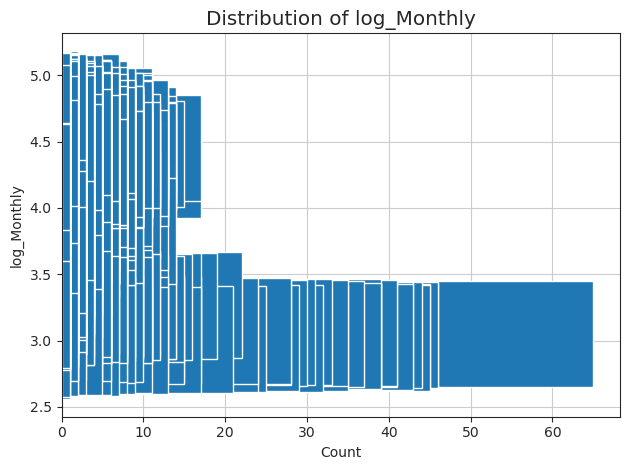

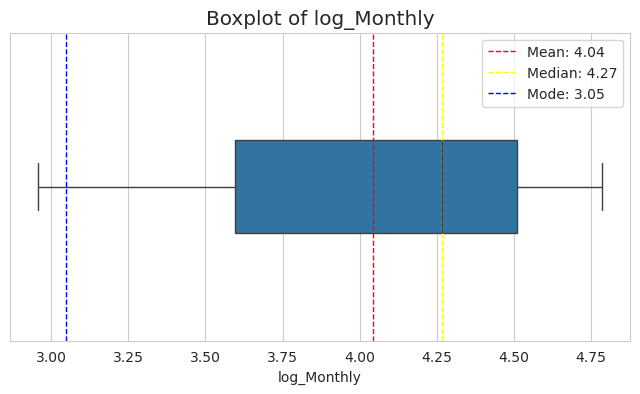

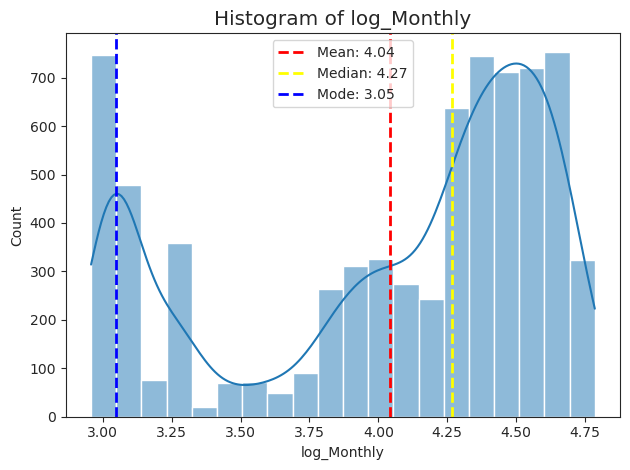

In [665]:
explore_distribution(x, 'log_Monthly')

=> Exploration of log_Tenure:

log_Tenure
0.693147    634
4.290459    369
1.098612    246
1.386294    207
1.609438    185
           ... 
3.663562     60
3.688879     59
3.806662     54
3.610918     50
0.000000     11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    -0.773836
kurtosis   -0.645068
count    7267.000000
mean        3.034902
std         1.156684
min         0.000000
25%         2.302585
50%         3.401197
75%         4.025352
max         4.290459
Name: log_Tenure, dtype: float64
------------------------------


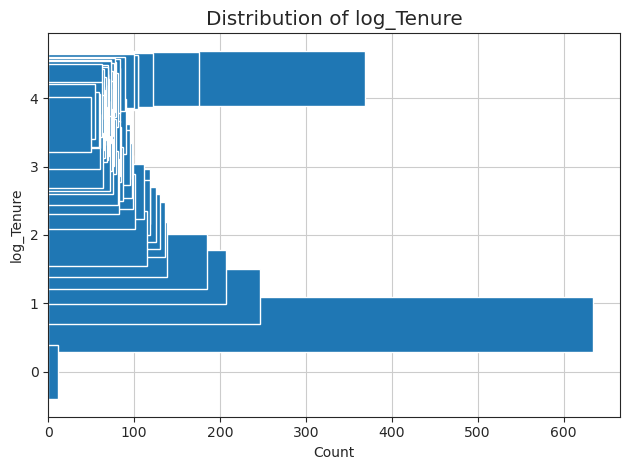

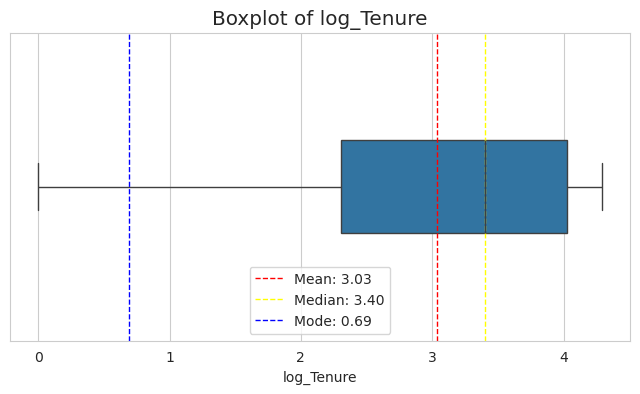

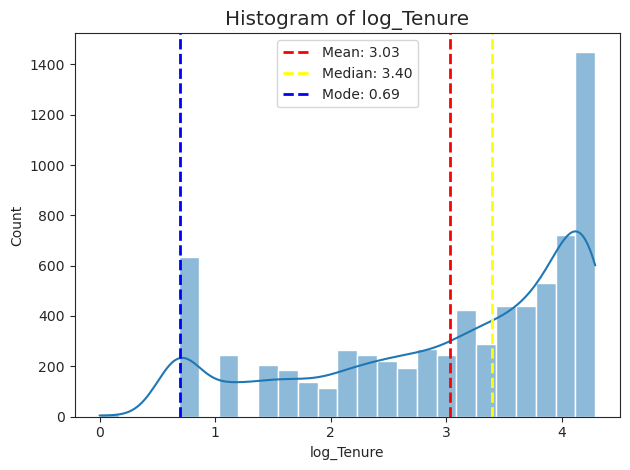

In [666]:
explore_distribution(x, 'log_Tenure')

#### Considerations

1. Log transformed data reached lesser values for kurtosis, but bigger values for skewness.

2. Transformed columns will be kept as extra possibilities for experimentation.

#### Tenure: Test binning strategies

Testing binning approaches for `Tenure`:
> "Tenure" feature is composed of continous unique values in the range of 0 to 72 months. Hence, a good candidate for binning. This section will explore the best approach, if any, for binning this feature.

##### Binning

In [667]:
def categorize_tenure(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]:
    """
    Categorize the 'Tenure' feature into different groups using two approaches.

    The first approach divides the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years.
    The second approach divides the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years.
    The third approach uses quantiles to divide the tenure into four groups.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the 'Tenure' column to be categorized.

    Returns
    -------
    Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]
        Modified DataFrame with 'TenureGroup1', 'TenureGroup2' and 'TenureGroupQuantile' columns,
        and three dictionaries for mapping the group codes to descriptive strings.
    """

    # Approach 1
    # Divide the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years
    bins1: List[int] = [0, 12, 36, 60, 72]
    labels1: List[int] = [0, 1, 2, 3]
    df['TenureGroup1'] = pd.cut(df['Tenure'], bins=bins1, labels=labels1, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group1_mapping: Dict[int, str] = {
        0: '< 1 year',
        1: '1 - 3 years',
        2: '3 - 5 years',
        3: '> 5 years'
    }

    # Approach 2
    # Divide the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years
    bins2: List[int] = [0, 6, 24, 48, 72]
    labels2: List[int] = [0, 1, 2, 3]
    df['TenureGroup2'] = pd.cut(df['Tenure'], bins=bins2, labels=labels2, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group2_mapping: Dict[int, str] = {
        0: '< 6 months',
        1: '6 months - 2 years',
        2: '2 - 4 years',
        3: '> 4 years'
    }

    # Approach 3
    # Divide the tenure into four groups using quantiles
    df['TenureGroupQuantile'] = pd.qcut(df['Tenure'], q=4, labels=False)

    # Mapping for group codes to descriptive strings
    tenure_group_quantile_mapping: Dict[int, str] = {
        0: '1st quartile (lowest 25%)',
        1: '2nd quartile (25%-50%)',
        2: '3rd quartile (50%-75%)',
        3: '4th quartile (highest 25%)'
    }

    return df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping

In [668]:
df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping = categorize_tenure(df)

##### Testing

=> Exploration of TenureGroup1:

TenureGroup1
0.0    2254
1.0    1908
2.0    1643
3.0    1451
Name: count, dtype: int64
------------------------------
Info:

skewness    0.226847
kurtosis   -1.306616
count    7256.000000
mean        1.315739
std         1.112404
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroup1, dtype: float64
------------------------------


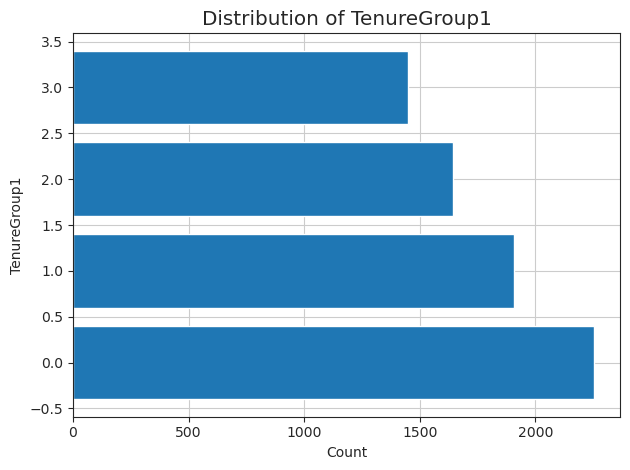

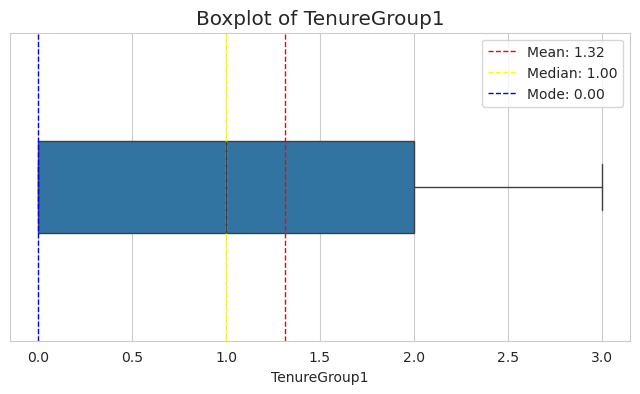

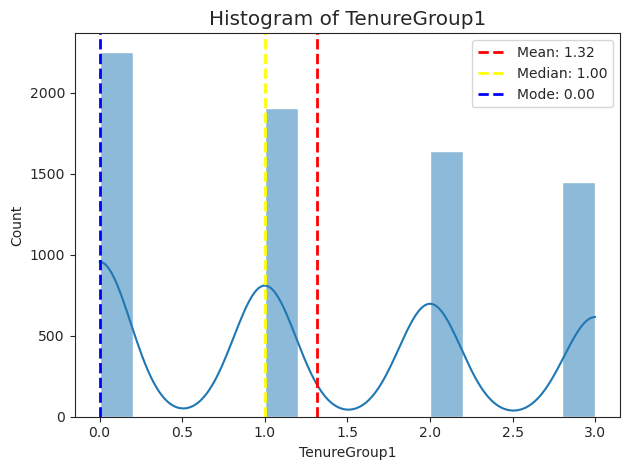

=> Exploration of TenureGroup2:

TenureGroup2
3.0    2309
1.0    1774
2.0    1648
0.0    1525
Name: count, dtype: int64
------------------------------
Info:

skewness    -0.159375
kurtosis   -1.381858
count    7256.000000
mean        1.653390
std         1.132885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: TenureGroup2, dtype: float64
------------------------------


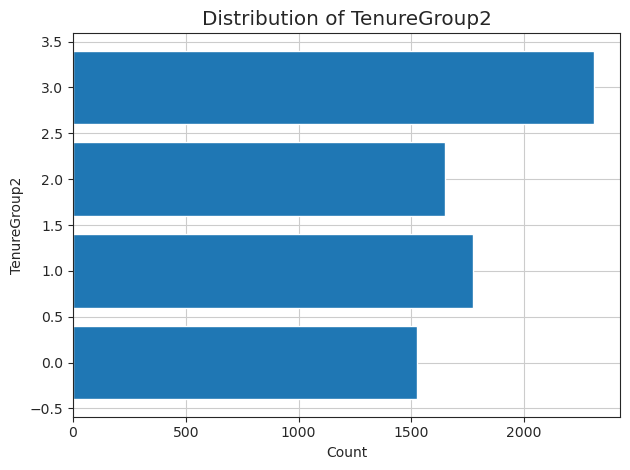

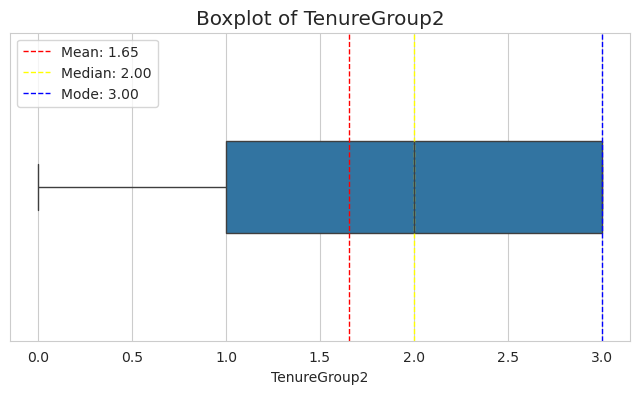

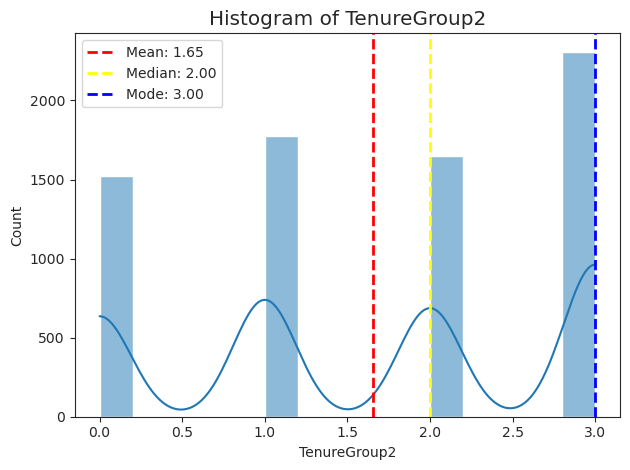

=> Exploration of TenureGroupQuantile:

TenureGroupQuantile
0    1927
3    1813
2    1770
1    1757
Name: count, dtype: int64
------------------------------
Info:

skewness    0.023608
kurtosis   -1.388869
count    7267.000000
mean        1.477363
std         1.130917
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroupQuantile, dtype: float64
------------------------------


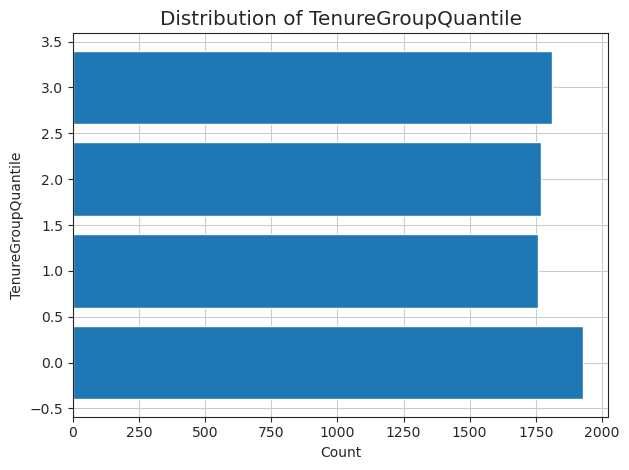

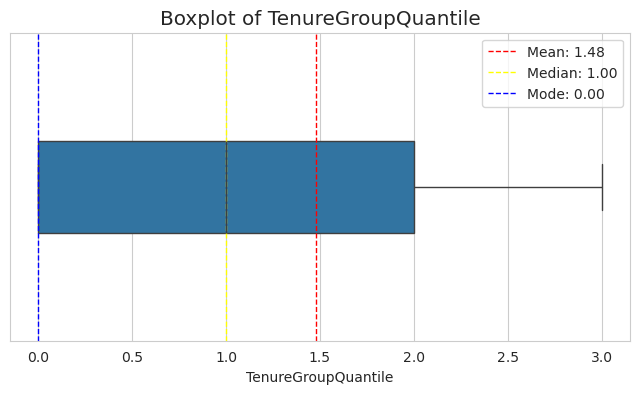

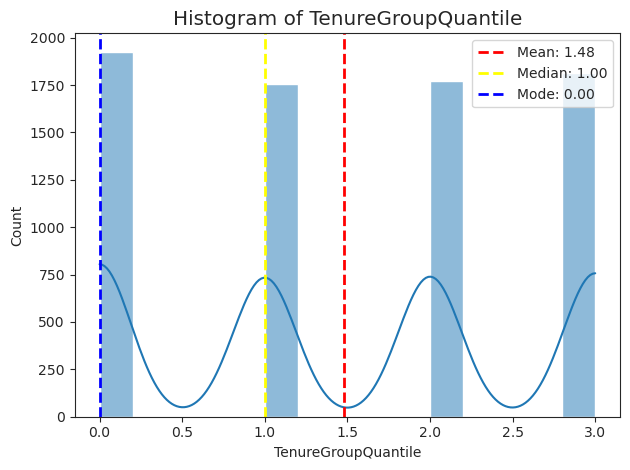

In [669]:
explore_distribution(df, 'TenureGroup1')
explore_distribution(df, 'TenureGroup2')
explore_distribution(df, 'TenureGroupQuantile')

#### Considerations

1. The `Tenure` is right-skewed distributed with an explosion for values >= 70 months.

2. All the approaches were unfair with the original data distribution, leading to loss of important information.
3. The most conservative approach of keeping the original data distribution was selected for Tree Models.
Values will be scaled alongside with the continous feature `Monthly`.

#### Scaling

Scaling continous features for Tree Models

In [670]:
scaler = MinMaxScaler()
x[['Monthly', 'Tenure']] = scaler.fit_transform(df[['Monthly', 'Tenure']])
print(x[['Monthly', 'Tenure']])

       Monthly    Tenure
0     0.471144  0.125000
1     0.414428  0.125000
2     0.553731  0.055556
3     0.793532  0.180556
4     0.653234  0.041667
...        ...       ...
7262  0.367164  0.180556
7263  0.665174  0.305556
7264  0.318905  0.027778
7265  0.493532  0.930556
7266  0.405473  0.875000

[7267 rows x 2 columns]


### Categoricals

Studying categorical features

In [671]:
categorical_features = [item for item in x.columns if x[item].dtype == 'O']
print(categorical_features)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### Binary features

In [672]:
binary_features = [item for item in categorical_features if x[item].nunique() == 2]
binary_features.remove('Gender')
print(binary_features)

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [673]:
x[binary_features] = x[binary_features].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
x.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,log_Monthly,log_Tenure
0,Female,0,1,1,0.125,1,No,DSL,No,Yes,No,Yes,Yes,No,Anual,1,Mailed check,0.471144,4.198705,2.302585
1,Male,0,0,0,0.125,1,Yes,DSL,No,No,No,No,No,Yes,Mensal,0,Mailed check,0.414428,4.109233,2.302585


#### Non binary features

In [674]:
non_binary_features = [item for item in categorical_features if item not in binary_features]
print(non_binary_features)

['Gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


### Encoding

#### OneHot Encoding X

In [675]:
# Encode non_binary_features using OneHotEncoder and make_column_transformer
ct = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), non_binary_features),
    remainder='passthrough'
)

x = ct.fit_transform(x)
x = pd.DataFrame(x, columns=ct.get_feature_names_out()) # type: ignore
x.head(2)

,onehotencoder__Gender_Male,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fibra Ótica,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__Tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Monthly,remainder__log_Monthly,remainder__log_Tenure
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.125,1.0,1.0,0.471144,4.198705,2.302585
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.125,1.0,0.0,0.414428,4.109233,2.302585


#### Label encoding Y

In [676]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y).astype('float64') # type: ignore
print(y)

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7262    0.0
7263    1.0
7264    0.0
7265    0.0
7266    0.0
Length: 7267, dtype: float64


### Dropping redundant features

Some features are redundant when considered in the context.  
- The information 'no phone service' is already at 'remainder__PhoneService'
- The information 'no internet service' is already at 'InternetService_No'

#### Columns

In [677]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_No
MultipleLines_No phone service
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


#### Dropping

In [678]:
print(f'Length before dropping: {x.shape[1]}')

for column_name in column_names:
    if re.search('_No internet service', column_name) or re.search('_No phone service', column_name):
        x.drop(columns=[f'onehotencoder__{column_name}'], inplace=True) # type: ignore
        
print(f'Length after dropping: {x.shape[1]}')

Length before dropping: 41
Length after dropping: 34


In [679]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_No
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_No
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_Yes
TechSupport_No
TechSupport_Yes
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


For the variables which was non binary due to the present of 'No phone service' and 'No internet service', it has kept the redundant information of a column for 'No' and other for 'Yes'.

Dropping all negative ('No') features with the exception of `'onehotencoder__InternetService_No'`:

In [680]:
print(f'Length before dropping: {x.shape[1]}')

for column_name in column_names:
    if re.search('_No', column_name) and column_name != 'InternetService_No':
        x.drop(columns=[f'onehotencoder__{column_name}'], inplace=True) # type: ignore
        
print(f'Length after dropping: {x.shape[1]}')

Length before dropping: 34
Length after dropping: 27


In [681]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_Yes
OnlineBackup_Yes
DeviceProtection_Yes
TechSupport_Yes
StreamingTV_Yes
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


### Reevaluating correlations

It is important to check the correlation values in the finalized data to check against the possibility of multicollinearity.  
Even though tree based models can handle multicollinearity with ease, removing highly correlated features make the model cleaner, easier to interpret and lighter.

In [682]:
x_corr = x.corr() # type: ignore
high_corrs = {f'{column}/{row}': value for column in x_corr.columns for row, value in x_corr[column].items() if abs(value) > 0.7 and column != row}
high_corrs_columns = []
for high_corr in high_corrs.keys():
    high_corr_0 = high_corr.split('/')[0]
    high_corr_1 = high_corr.split('/')[1]
    high_corrs_columns.append(high_corr_0) if high_corr_0 not in high_corrs_columns else None
    high_corrs_columns.append(high_corr_1) if high_corr_1 not in high_corrs_columns else None

['onehotencoder__InternetService_Fibra Ótica', 'remainder__Monthly', 'remainder__log_Monthly', 'onehotencoder__InternetService_No', 'remainder__Tenure', 'remainder__log_Tenure']

{'onehotencoder__InternetService_Fibra Ótica/remainder__Monthly': 0.7884533834442493,
 'onehotencoder__InternetService_Fibra Ótica/remainder__log_Monthly': 0.7255894621158505,
 'onehotencoder__InternetService_No/remainder__Monthly': -0.7637717943102528,
 'onehotencoder__InternetService_No/remainder__log_Monthly': -0.8641506185792794,
 'remainder__Monthly/onehotencoder__InternetService_Fibra Ótica': 0.7884533834442493,
 'remainder__Monthly/onehotencoder__InternetService_No': -0.7637717943102528,
 'remainder__Monthly/remainder__log_Monthly': 0.977358292746276,
 'remainder__Tenure/remainder__log_Tenure': 0.9139425636882225,
 'remainder__log_Monthly/onehotencoder__InternetService_Fibra Ótica': 0.7255894621158505,
 'remainder__log_Monthly/onehotencoder__InternetService_No': -0.8641506185792794,
 'remainder__log_Mon

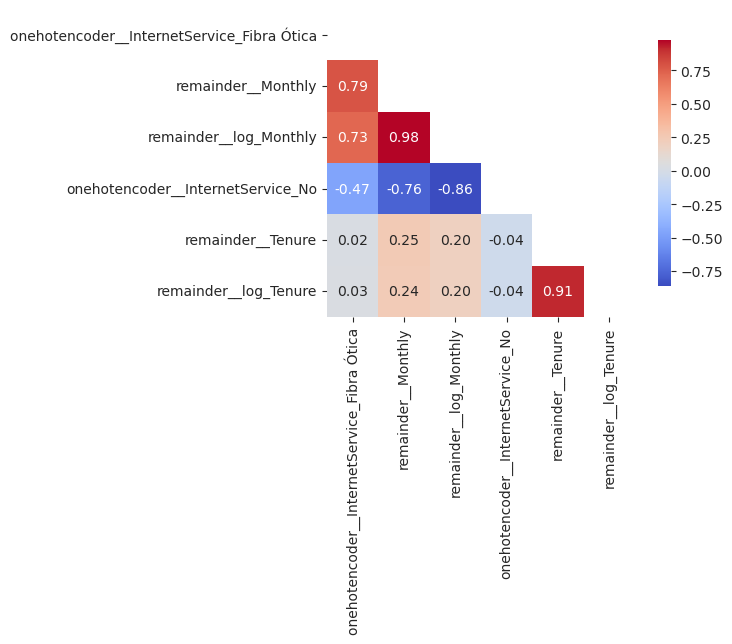

In [683]:
print(f'{high_corrs_columns}\n')
pprint(high_corrs)
plot_correlation(x, high_corrs_columns)

#### Considerations

1. Log-transformed values are correlated to the originals as expected, but it shall be used either one or the other in the training phase.

3. The only correlations above 0.7 found are between the existance of Internet Service and the Monthly fee. This information is important and shall be kept.
3.  `log_Monthly`'s correlation with the existance of Internet Service is even higher, which may be a redflag in the decision of using logistic regression. Experimentation shall be more prudent.

### Spliting train and test sets

The strategy decided to be adopted will be of using GridSearch Cross Validation with Stratified K-Fold, which therefore needs splitting data into train and test, but not to manually split validation sets.

#### X and Y

Visualizing to check if everything is OK.

In [684]:
print(f'=> X Variable:\n\n{x.iloc[0]}') # type: ignore

=> X Variable:

onehotencoder__Gender_Male                                0.000000
onehotencoder__MultipleLines_Yes                          0.000000
onehotencoder__InternetService_DSL                        1.000000
onehotencoder__InternetService_Fibra Ótica                0.000000
onehotencoder__InternetService_No                         0.000000
onehotencoder__OnlineSecurity_Yes                         0.000000
onehotencoder__OnlineBackup_Yes                           1.000000
onehotencoder__DeviceProtection_Yes                       0.000000
onehotencoder__TechSupport_Yes                            1.000000
onehotencoder__StreamingTV_Yes                            1.000000
onehotencoder__StreamingMovies_Yes                        0.000000
onehotencoder__Contract_Anual                             1.000000
onehotencoder__Contract_Bianual                           0.000000
onehotencoder__Contract_Mensal                            0.000000
onehotencoder__PaymentMethod_Bank transfer (au

In [685]:
print(f'=> Y Variable:\n\n{y}')

=> Y Variable:

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7262    0.0
7263    1.0
7264    0.0
7265    0.0
7266    0.0
Length: 7267, dtype: float64


#### Splitting

A function shall consider either to use the original or the log-transformed continous variables.

In [686]:
def split_data(x, y, test_size=0.2, random_state=42, is_log=False):
    if is_log:
        x = x.drop(columns=['remainder__Tenure', 'remainder__Monthly'])
    else:
        x = x.drop(columns=['remainder__log_Tenure', 'remainder__log_Monthly'])
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

In [687]:
x_train, x_test, y_train, y_test = split_data(x, y, test_size=0.2, random_state=42, is_log=False)
x_train_log, x_test_log, y_train_log, y_test_log = split_data(x, y, test_size=0.2, random_state=42, is_log=True)

In [688]:
print('=> Train and Test Data:\n')

print('With Tenure and Monthly:\n')
print('Shapes: x_train, x_test, y_train, y_test')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, '\n')
print('X Columns:\n')
print(x_train.columns, '\n')

=> Train and Test Data:

With Tenure and Monthly:

Shapes: x_train, x_test, y_train, y_test
(5813, 25) (1454, 25) (5813,) (1454,) 

X Columns:

Index(['onehotencoder__Gender_Male', 'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fibra Ótica',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Anual', 'onehotencoder__Contract_Bianual',
       'onehotencoder__Contract_Mensal',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'remainder__Part

In [689]:
print('=> Train and Test Data:\n')

print('With log_Tenure and log_Monthly:\n')
print('Shapes: x_train_log, x_test_log, y_train_log, y_test_log')
print(x_train_log.shape, x_test_log.shape, y_train_log.shape, y_test_log.shape, '\n')
print('X Columns:\n')
print(x_train_log.columns, '\n')

=> Train and Test Data:

With log_Tenure and log_Monthly:

Shapes: x_train_log, x_test_log, y_train_log, y_test_log
(5813, 25) (1454, 25) (5813,) (1454,) 

X Columns:

Index(['onehotencoder__Gender_Male', 'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fibra Ótica',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Anual', 'onehotencoder__Contract_Bianual',
       'onehotencoder__Contract_Mensal',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',

### Oversampling with SMOTE

SMOTE oversampling strategy will be used to balance the 'Churn' (Y) variable in the training sets

In [690]:
def oversample(x_train, y_train):
    sm = SMOTE(random_state=42)
    x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train) # type: ignore
    return x_train_sm, y_train_sm

In [691]:
x_train_sm, y_train_sm = oversample(x_train, y_train)
x_train_log_sm, y_train_log_sm = oversample(x_train_log, y_train_log)

print('Shape original x_train, y_train:', x_train_sm.shape, y_train_sm.shape)
print('Shape x_train_log, y_train_log:', x_train_log_sm.shape, y_train_log_sm.shape)

Shape original x_train, y_train: (8534, 25) (8534,)
Shape x_train_log, y_train_log: (8534, 25) (8534,)


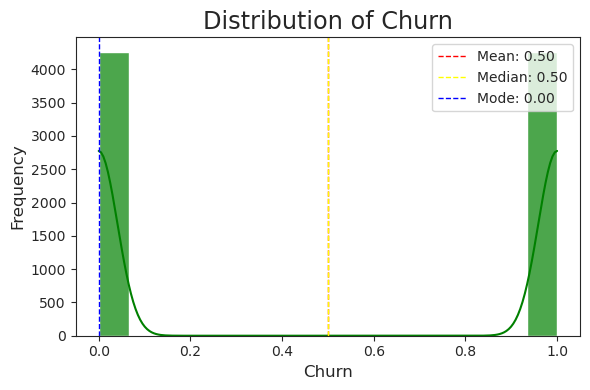

In [692]:
plot_feature(pd.DataFrame(y_train_sm, columns=['Churn']), 'Churn')

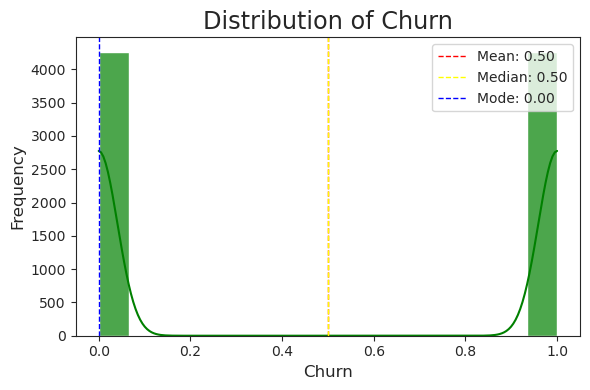

In [693]:
plot_feature(pd.DataFrame(y_train_log_sm, columns=['Churn']), 'Churn')

## Training Models

### Linear Regression Model

### Logistic Regression Model

### Decision Tree Classifier

### Random Forest Classifier